# TP3: Detector de SPAM

## Autores: 
* Mauro Barquinero
* Yandri Uchuari
* Marck Murillo
* Matias Tripode


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Metricas
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
# Clasificadores de Regression Logistica
from sklearn.linear_model import LogisticRegression
# Clasificadores Bayessianos Ingenuo
from sklearn.naive_bayes import MultinomialNB


---------------------------------------------

**1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM?**

In [14]:
dataset = pd.read_csv("spambase.csv")

# Separar SPAM y NO SPAM
spam_data = dataset[dataset['spam'] == 1]
no_spam_data = dataset[dataset['spam'] == 0]

# Sumar las frecuencias de palabras para cada clase
spam_word_freq = spam_data.iloc[:, :-1].sum()
no_spam_word_freq = no_spam_data.iloc[:, :-1].sum()

# Obtener las 10 palabras más comunes en cada clase
top_spam_words = spam_word_freq.nlargest(10)
top_no_spam_words = no_spam_word_freq.nlargest(10)

# Crear un DataFrame para visualización
def clean_feature_names(name):
    return name.replace('word_freq_', '')

top_spam_words = pd.DataFrame({
    'Palabra': [clean_feature_names(x) for x in top_spam_words.index],
    'Frecuencia': top_spam_words.values,
    'Tipo': 'SPAM'
})

top_no_spam_words = pd.DataFrame({
    'Palabra': [clean_feature_names(x) for x in top_no_spam_words.index],
    'Frecuencia': top_no_spam_words.values,
    'Tipo': 'NO SPAM'
})


# Mostrar resultados
print("Las 10 Palabras más comunes en SPAM:")
print(top_spam_words)

print("Las 10 Palabras más comunes en NO SPAM:")
print(top_no_spam_words)


Las 10 Palabras más comunes en SPAM:
                      Palabra  Frecuencia  Tipo
0    capital_run_length_total  853233.000  SPAM
1  capital_run_length_longest  189265.000  SPAM
2  capital_run_length_average   17258.246  SPAM
3                         you    4105.610  SPAM
4                        your    2502.610  SPAM
5                        will     997.100  SPAM
6                        free     939.790  SPAM
7                         our     931.800  SPAM
8                 char_freq_!     931.361  SPAM
9                         all     732.080  SPAM
Las 10 Palabras más comunes en NO SPAM:
                      Palabra  Frecuencia     Tipo
0    capital_run_length_total  450181.000  NO SPAM
1  capital_run_length_longest   50782.000  NO SPAM
2  capital_run_length_average    6627.915  NO SPAM
3                         you    3541.710  NO SPAM
4                      george    3527.560  NO SPAM
5                          hp    2496.580  NO SPAM
6                        will    1495.

 **¿Hay palabras en común?**

In [15]:

# Encontrar palabras comunes
common_words = set(top_spam_words['Palabra']).intersection(set(top_no_spam_words['Palabra']))

print("\nPalabras comunes en ambos tops:")
print(common_words)


Palabras comunes en ambos tops:
{'capital_run_length_total', 'capital_run_length_average', 'your', 'capital_run_length_longest', 'will', 'you'}


**¿Algunas llaman la atención?**

Es llamativo que ambas `you` y `your` sean palabras comunes en SPAM y NO SPAM, y ademas con alta frequencia.  

--------------------

**2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).**

In [16]:
# Obtenemos los atributos y target
X = (dataset.drop(columns="spam") * 100).astype(int)
#X = dataset2.drop(columns="spam")
y = dataset["spam"]

In [17]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)

--------------------------

**3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.**

In [18]:
# Entrenar modelo  multinomiaNB
multinomial_model = MultinomialNB()

# Entrenar usando el conjunto de entrenamiento
multinomial_model.fit(X_train, y_train)

# Predicciones  multinomiaNB
y_train_pred_nb = multinomial_model.predict(X_train)
y_test_pred_nb = multinomial_model.predict(X_test)

------------------------

**4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).**

In [19]:
# Normalizar los datos
scaler = MinMaxScaler() #MinMaxScaler() / StandardScaler
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Crear el modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
logistic_model.fit(X_train_normalized, y_train)

# Predicciones
y_train_pred = logistic_model.predict(X_train_normalized)
y_test_pred = logistic_model.predict(X_test_normalized)

----------------------------------

**5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos.**
- ¿Qué tipo de error comete más cada modelo? 
- ¿Cuál de los dos tipos de error crees que es más importante para este problema?

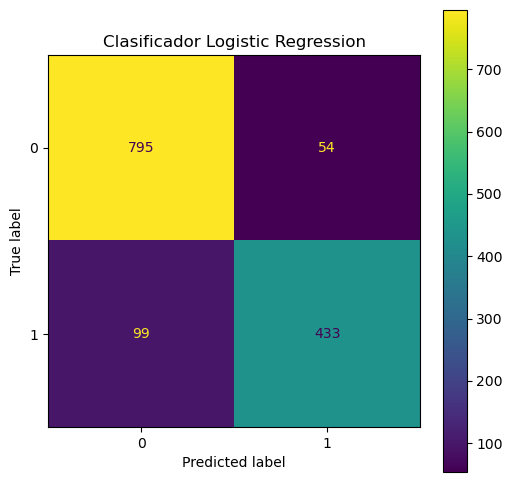

In [20]:
# Matriz de confusión para Logistic Regression
lr_conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_conf_matrix,
                              display_labels=logistic_model.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Logistic Regression");



Matriz de confusión para MultinomialNB:
Verdaderos negativos: 705
Falsos positivos: 144
Falsos negativos: 133
Verdaderos positivos: 399


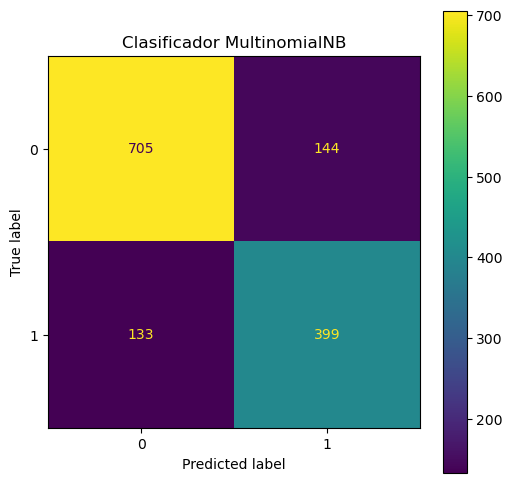

In [21]:


# Matriz de confusión para MultinomialNB
nb_conf_matrix = confusion_matrix(y_test, y_test_pred_nb)
print("")
print("Matriz de confusión para MultinomialNB:")
print(f"Verdaderos negativos: {nb_conf_matrix[0][0]}")
print(f"Falsos positivos: {nb_conf_matrix[0][1]}")
print(f"Falsos negativos: {nb_conf_matrix[1][0]}")
print(f"Verdaderos positivos: {nb_conf_matrix[1][1]}")

disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix,
                              display_labels=multinomial_model.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador MultinomialNB");

**Respuesta**

**¿Qué tipo de error comete más cada modelo?**

- Ambos modelos cometen errores de `falso positivos` y `falsos negativos`. Pero se destaca que el `MultinomialNB` tiene un número mayor de esos errores. En especial los `Falsos positivos` son de vital importancia para el caso de detectar SPAM.

**¿Cuál de los dos tipos de error crees que es más importante para este problema?**

- Los `falsos positivos` son más importantes en este contexto, ya que podria pasar que detecte un email importante (informacion bancaria u oferta laboral)
y lo clasifique como SPAM y el usuario no lo lea a tiempo a dicho email.
- Por otro lado los `falsos negativos` permitiria que el SPAM llegue a la bandeja principal del usuario, tambien afectando la experiencia de usuario.


-----------------------------------

**6. Calcule la precisión y la recuperación de ambos modelos.** 

In [22]:
# Evaluar modelo MultinomialNB
print("\n=== Evaluación en Conjunto de Prueba: MultinomialNB ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred_nb))
print(classification_report(y_test, y_test_pred_nb))




=== Evaluación en Conjunto de Prueba: MultinomialNB ===
Accuracy: 0.7994207096307024
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       849
           1       0.73      0.75      0.74       532

    accuracy                           0.80      1381
   macro avg       0.79      0.79      0.79      1381
weighted avg       0.80      0.80      0.80      1381



In [23]:
# Evaluar el modelo LogisticRegression
print("\n=== Evaluación en Conjunto de Prueba ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


=== Evaluación en Conjunto de Prueba ===
Accuracy: 0.889210716871832
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       849
           1       0.89      0.81      0.85       532

    accuracy                           0.89      1381
   macro avg       0.89      0.88      0.88      1381
weighted avg       0.89      0.89      0.89      1381



**MultinomialNB**

<center>

class | precision | recall  | f1-score |  train/test
:---: | :---: | :---: | :---:  |  :---:
NO SPAM |  0.82   |  0.82     |  0.82    | test
SPAM    | 0.73    | 0.73    |  0.86    | test


</center>

**Logistic Regression**

<center>

class | precision | recall  | f1-score  | train/test
:---: | :---: | :---: | :---:  | :---:
NO SPAM |  0.92   |   0.94   |  0.94 |  test
SPAM    | 0.91   |    0.88    |   0.90  | test
 

</center>

Para cada métrica:
 
**¿Cuál es el mejor modelo?**

`Respuesta`:
    - El `Logisitc Regression` tiene mayor `recall` (recuperacion) y mas `acurracy` (precision) que el MultinomialNB. 



**¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior?**

`Respuesta`:

- `Precision (Accuracy)` : Se refiere a la proporcion de los casos positivos identificados correctamente por el clasificador con respecto a todos los casos que el clasificador etiquetó como positivos.
- `Recuperacion (Recall)`:Indica la capacidad del clasificador para recuperar los casos positivos.Es útil cuando queremos minimizar los falsos negativo. Un alto recall significa que el modelo está identificando casi todos los SPAM, aunque pueda cometer algunos errores de falsos positivos

**Expanda su respuesta.**

`Respuesta`:
    - Como nos interesa minimizar falsos positivos, la metrica `Precision` (`Accuracy`) es la mas importante. Por ende el modelo con mayor `Precision` será preferido (en este caso el `Logistic Regression`).

----------------------------------

**7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.**

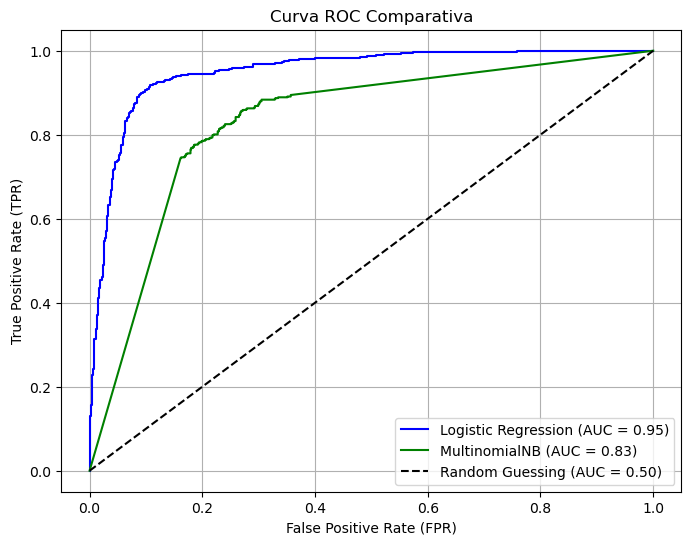

In [24]:
# Obtener probabilidades de predicción para ambos modelos
logistic_probs = logistic_model.predict_proba(X_test_normalized)[:, 1]
multinomial_probs = multinomial_model.predict_proba(X_test)[:, 1]

# Calcular curvas ROC
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_probs)
fpr_multinomial, tpr_multinomial, _ = roc_curve(y_test, multinomial_probs)

# Calcular AUC
auc_logistic = auc(fpr_logistic, tpr_logistic)
auc_multinomia = auc(fpr_multinomial, tpr_multinomial)

# Graficar curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {auc_logistic:.2f})', color='blue')
plt.plot(fpr_multinomial, tpr_multinomial, label=f'MultinomialNB (AUC = {auc_multinomia:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')

# Personalizar gráfico
plt.title('Curva ROC Comparativa')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()
